Each image is 50 pixels high and 37 pixels wide.
Total dataset size:
n_samples: 1288
n_features (image size): 1850
n_classes (unique people): 7


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3146 - loss: 1.8749 - val_accuracy: 0.4289 - val_loss: 1.6887
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3986 - loss: 1.6989 - val_accuracy: 0.4806 - val_loss: 1.5820
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4405 - loss: 1.5954 - val_accuracy: 0.4367 - val_loss: 1.5598
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4531 - loss: 1.5469 - val_accuracy: 0.4935 - val_loss: 1.4512
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5251 - loss: 1.4143 - val_accuracy: 0.5116 - val_loss: 1.3924
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4897 - loss: 1.3877 - val_accuracy: 0.4806 - val_loss: 1.4259
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5085 - loss: 1.3427 - val_accuracy: 0.5297 - val_loss: 1.2787
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5152 - loss: 1.2749 - val_accuracy: 0.5762 - val_loss

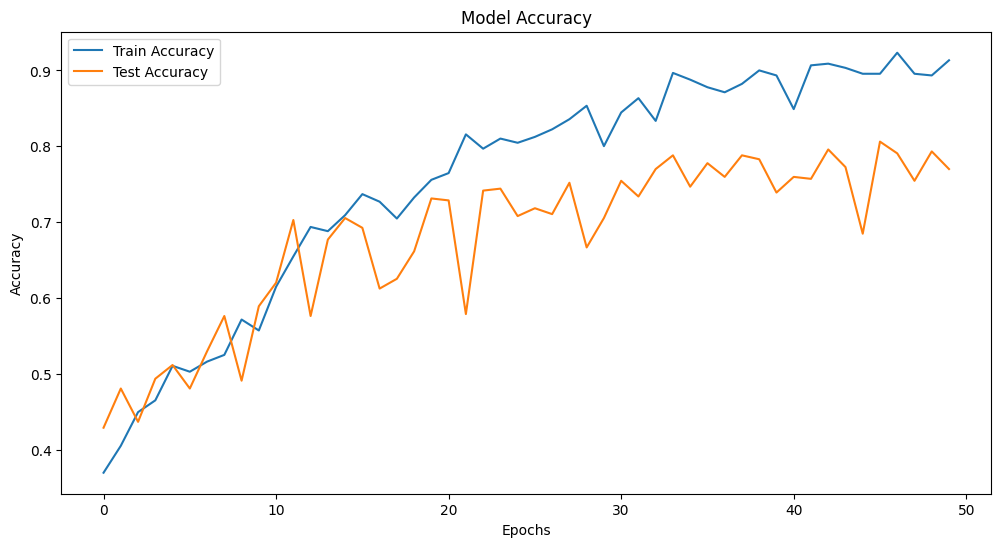

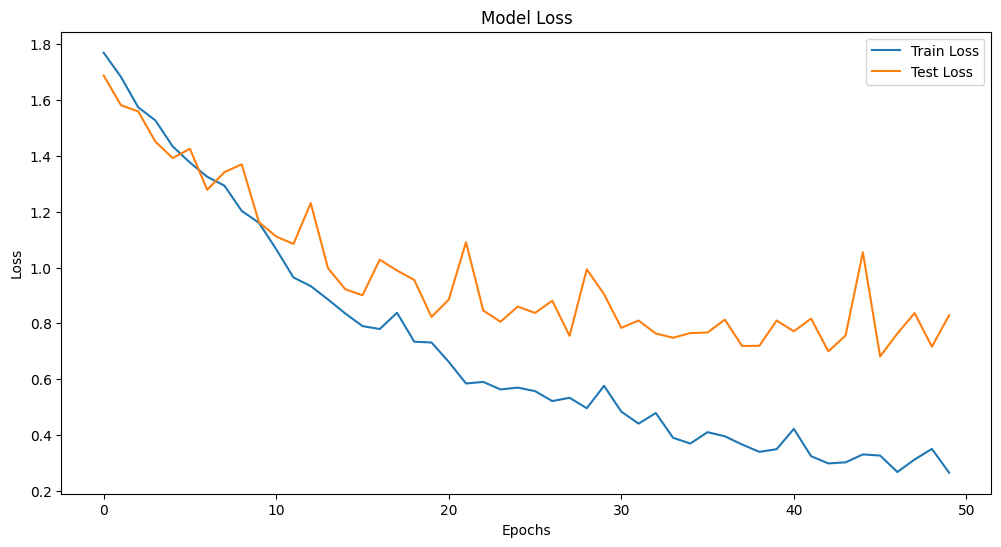

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


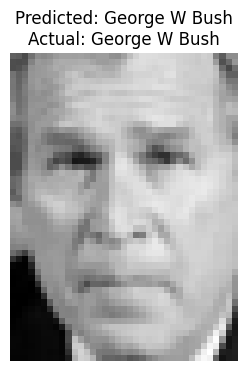

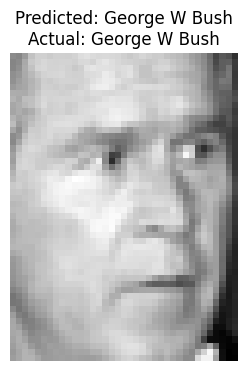

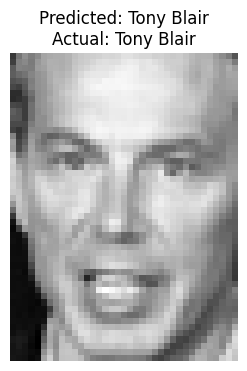

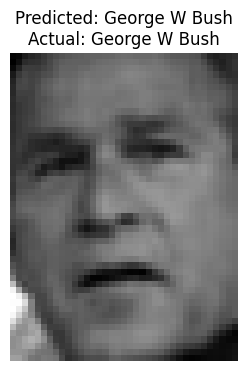

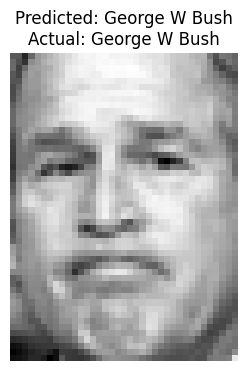

In [3]:
# Step 1: Import necessary libraries
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the LFW Dataset (only people with at least 70 images)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # Flattened images
y = lfw_people.target  # Labels (person ID)
target_names = lfw_people.target_names  # Names of the people
images = lfw_people.images  # Original images (for reference)

# Determine image dimensions
image_height, image_width = images.shape[1], images.shape[2]
print(f"Each image is {image_height} pixels high and {image_width} pixels wide.")

# Print information about the dataset
print(f"Total dataset size:")
print(f"n_samples: {X.shape[0]}")
print(f"n_features (image size): {X.shape[1]}")  # Should be image_height * image_width
print(f"n_classes (unique people): {len(target_names)}")

# Verify the feature size matches the image dimensions
expected_features = image_height * image_width
if X.shape[1] != expected_features:
    print(f"Warning: Expected feature size {expected_features}, but got {X.shape[1]}.")

# Step 3: One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer
])

# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 9: Visualize the training process

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 10: Make Predictions on the Test Set

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Step 11: Display the first 5 test samples with their predictions (Correct reshaping)
for i in range(5):
    # Ensure that the index is within the range of X_test
    if i >= len(X_test):
        print(f"Test sample {i} is out of range.")
        continue

    # Reshape the flattened image back to its original dimensions
    try:
        image = X_test[i].reshape(image_height, image_width)
    except ValueError as e:
        print(f"Error reshaping image {i}: {e}")
        continue

    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {target_names[predicted_classes[i]]}\nActual: {target_names[actual_classes[i]]}")
    plt.axis('off')
    plt.show()
